In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import figures
# import itertools
# import fastmatch
# import matchutil
# from imaging import open_img
# from cache import Metric_Cache, Grid_Cache
# import cProfile

#FROM PYTHON
from __future__ import print_function
from imaging import open_img
from bak.cache import Metric_Cache#, Grid_Cache
import bak.fastmatch as fastmatch
import figures
import cProfile

In [3]:
target_path = "C:/Data/Datasets/UW_matching/000224_224_left.jpg"
query_path = "C:/Data/Datasets/UW_matching/000236_236_left.jpg"
query_cache = Metric_Cache(query_path)
target_img = open_img(target_path)
query_img = open_img(query_path)

In [4]:
log = []
options = {"evaluate_verbose" : True, 
           "distance_threshold" : 5, 
           "thumb_strategy" : lambda n : min(n*1.2, 0.9),
           "grid_size" : (75, 75),
           "grid_margin" : 30,
           "radius" : 50,
           "log" : log}

In [5]:
match_fun = fastmatch.match(query_cache, target_img, options = options)
matches = list(match_fun(0.8))

Creating grid cache timee: 0.0 secs.
Position iter time: 0.0 secs.
Matches time: 0.0 secs.


In [6]:
# log = []
# options = {"evaluate_verbose" : True, 
#            "distance_threshold" : 5, 
#            "thumb_strategy" : lambda n : min(n*1.2, 0.9),
#            "grid_size" : (75, 75),
#            "grid_margin" : 30,
#            "radius" : 50,
#            "log" : log}
#profile.run('list(match_fun(0.9, 0.9))')
cProfile.run('list(fastmatch.match(query_cache, target_img, options = options)(0.9, 0.9))')
#matches = fastmatch.match(query_cache, target_img, options = options)(0.9, 0.9)
#print(sorted(zip(*matches)[1]))
print("length of log: %i" % len(log))

Creating grid cache timee: 0.0 secs.
Position iter time: 0.0 secs.
Matches time: 0.0 secs.
         337982 function calls (337981 primitive calls) in 2.668 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      678    0.002    0.000    0.014    0.000 <__array_function__ internals>:2(argsort)
      681    0.001    0.000    0.008    0.000 <__array_function__ internals>:2(atleast_1d)
      681    0.001    0.000    0.005    0.000 <__array_function__ internals>:2(copyto)
      681    0.001    0.000    0.021    0.000 <__array_function__ internals>:2(sum)
      681    0.001    0.000    0.003    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
      681    0.001    0.000    0.002    0.000 <frozen importlib._bootstrap>:416(parent)
        1    0.046    0.046    2.668    2.668 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 Image.py:1194(draft)
        2    0.000    0.000    0.076    0.038 Image.py:1905(re

In [7]:
log2 = []
options = {"evaluate_verbose" : True, 
           "distance_threshold" : 5, 
           "thumb_strategy" : lambda n : min(n*1.2, 0.9),
           "grid_size" : (75, 75),
           "grid_margin" : 40,
           "log" : log2,
           "radius" : 50,
           "thumb_size" : (250, 250)}
#profile.run('list(match_fun(0.9, 0.9))')
cProfile.run('list(fastmatch.match(query_cache, target_img, options = options)(0.9, 0.9))')
#matches = list(fastmatch.match(query_cache, target_img, options = options)(0.9, 0.9))
#print(sorted(zip(*matches)[1]))
print("length of log: %i" % len(log2))

Creating grid cache timee: 0.0 secs.
Position iter time: 0.0 secs.
Matches time: 0.0 secs.
         414196 function calls (414195 primitive calls) in 3.053 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      684    0.002    0.000    0.014    0.000 <__array_function__ internals>:2(argsort)
      688    0.001    0.000    0.008    0.000 <__array_function__ internals>:2(atleast_1d)
      688    0.001    0.000    0.005    0.000 <__array_function__ internals>:2(copyto)
      688    0.001    0.000    0.021    0.000 <__array_function__ internals>:2(sum)
      688    0.001    0.000    0.002    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
      688    0.001    0.000    0.002    0.000 <frozen importlib._bootstrap>:416(parent)
        1    0.012    0.012    3.053    3.053 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 Image.py:1194(draft)
        1    0.000    0.000    0.000    0.000 Image.py:1888(_g

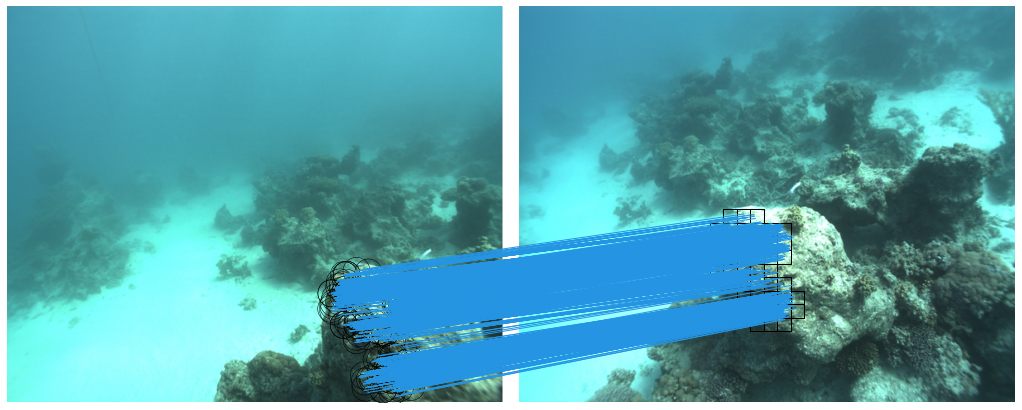

In [9]:
figures.visualize_log(log, query_img[:,:,::-1], target_img[:,:,::-1], stop_at =  100)

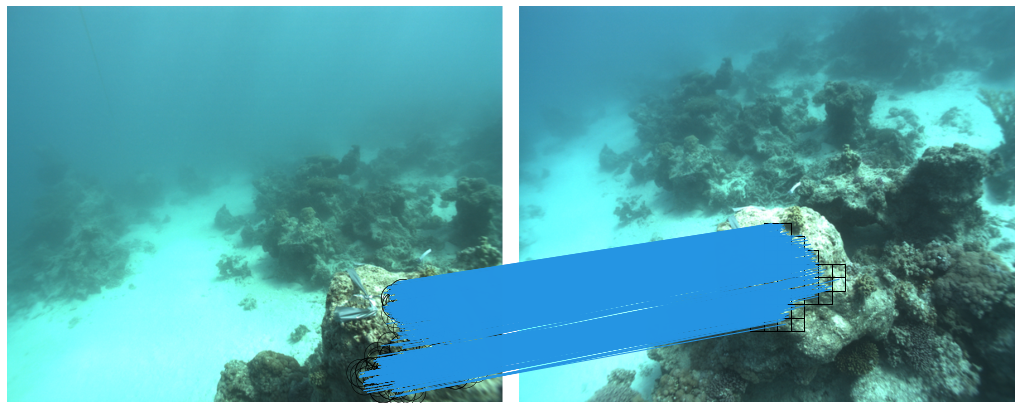

In [10]:
figures.visualize_log(log2, query_img[:,:,::-1], target_img[:,:,::-1], stop_at = 100)